In [1]:
import tensorflow as tf
import os
from tensorflow.keras.applications import EfficientNetB3


# Define the paths to your dataset
data_dir = 'E:/datanew'

# Define the image size, batch size and number of epochs
img_size = (224, 224)
batch_size = 32
epochs = 3

# Define the label names
label_names = sorted(os.listdir(data_dir))

# Define the ImageDataGenerator for preprocessing the images
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 validation_split=0.2)

# Define the training and validation sets
train_generator = data_generator.flow_from_directory(data_dir,
                                                      target_size=img_size,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      classes=label_names,
                                                      subset='training')

val_generator = data_generator.flow_from_directory(data_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    classes=label_names,
                                                    subset='validation')

# Define the pre-trained model
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet',
                                         include_top=False,
                                         input_shape=(img_size[0], img_size[1], 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(len(label_names), activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=val_generator)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print('Validation accuracy:', val_acc)


Found 1291 images belonging to 22 classes.
Found 314 images belonging to 22 classes.


C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/3
41/41 [==============================] - 475s 11s/step - loss: 1.7627 - accuracy: 0.5747 - val_loss: 3.9236 - val_accuracy: 0.0191
Epoch 2/3
41/41 [==============================] - 435s 11s/step - loss: 0.7844 - accuracy: 0.8048 - val_loss: 3.8299 - val_accuracy: 0.0191
Epoch 3/3
10/10 [==============================] - 22s 2s/step - loss: 3.8037 - accuracy: 0.0764
Validation accuracy: 0.07643312215805054


In [9]:
print(cm)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 144   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  14   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0 

C:\Users\D. RHUTHVIK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


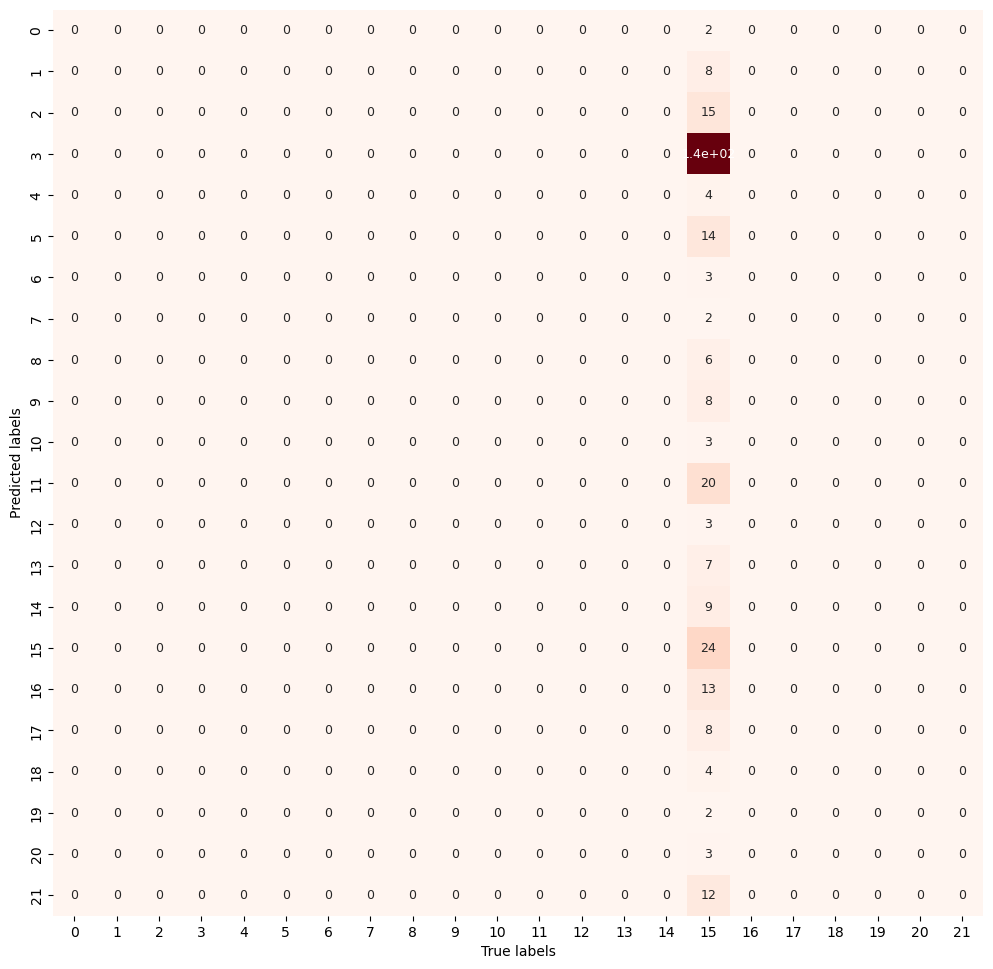

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=[12,12], dpi=100)
sns.heatmap(cm, 2,
            cbar=False,
            annot=True,
            annot_kws={"size": 9},
            cmap=plt.cm.Reds)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Generate predictions for the validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

10/10 [==============================] - 23s 2s/step


In [7]:
# confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# print(confusion_mtx)
import sklearn
cm=sklearn.metrics.confusion_matrix(y_true,y_pred_classes)
print(cm)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 144   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  14   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   8   0   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0 

In [11]:
print(label_names)

['Abdomen and Chest', 'Ankle', 'Cervical Spine', 'Chest', 'Elbow', 'Feet', 'Finger', 'Forearm', 'Hand', 'Hand and Wrist', 'Hip', 'Knee', 'Lower Leg', 'Lumbar Spine', 'Lumbar Spine and Thoracic Spine', 'Others', 'Pelvis', 'Shoulder', 'Sinus', 'Skull', 'Thoracic Spine', 'Wrist']


In [12]:
print(y_true)

[ 0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  7  7
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 13 13 13 13 13 13 13 14
 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 17 17 18 18 18 18 19 19 20 20 20 21 21 21 21 21 21 21 21 21 21
 21 21]


In [22]:
c=np.zeros((22,22))
cj=np.sum(cm,axis=1)

for i in range(len(cm)):
    for j in range(len(cm)):
        c[i][j]=np.round((cm[i][j]/cj[i]),2)

In [19]:
print(cj)

[  2   8  15 144   4  14   3   2   6   8   3  20   3   7   9  24  13   8
   4   2   3  12]
